# **Smart Cities: the use of sensors to tackle the Urban Heat Island effect**

#### *A Data Science for Smart Cities project carried out with Jupyter and Python*

#### Data source: [Road Weather Information Stations, City of Seattle Open Data Portal.](https://data.seattle.gov/Transportation/Road-Weather-Information-Stations/egc4-d24i)

In [1]:
#Import libraries
import dask.dataframe as dd #High-performance data frame handler
import pandas as pd
import numpy as np
 
#Locate file and load it as data frame with proper data types
filename = 'Road_Weather_Information_Stations.csv'
df = dd.read_csv(filename, 
                 dtype={'StationName': str, 'StationLocation': object, 
                        'RecordId':int, 'RoadSurfaceTemperature': float, 'AirTemperature': float},
                 parse_dates=['DateTime'])

#Visualize first 5 rows
df.head(5)

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
0,35thAveSW_SWMyrtleSt,"(47.53918, -122.37658)",2014-03-03 12:42:00,672560,53.88,53.88
1,35thAveSW_SWMyrtleSt,"(47.53918, -122.37658)",2014-03-03 12:43:00,672561,54.05,54.05
2,35thAveSW_SWMyrtleSt,"(47.53918, -122.37658)",2014-03-03 12:44:00,672562,54.21,54.21
3,35thAveSW_SWMyrtleSt,"(47.53918, -122.37658)",2014-03-03 12:45:00,672563,54.38,54.38
4,35thAveSW_SWMyrtleSt,"(47.53918, -122.37658)",2014-03-03 12:46:00,672564,54.54,54.54


In [2]:
#Visualize last 5 of 708,891 rows
df.tail(5)

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
708887,SpokaneSwingBridge,"(47.571389, -122.351743)",2017-10-24 07:06:00,2501737,50.43,56.26
708888,SpokaneSwingBridge,"(47.571389, -122.351743)",2017-10-24 07:07:00,2501738,50.44,56.14
708889,SpokaneSwingBridge,"(47.571389, -122.351743)",2017-10-24 07:08:00,2501739,50.47,56.11
708890,SpokaneSwingBridge,"(47.571389, -122.351743)",2017-10-24 07:09:00,2501740,50.47,56.05
708891,SpokaneSwingBridge,"(47.571389, -122.351743)",2017-10-24 07:10:00,2501741,50.50,56.06


In [3]:
#Visualize data types
df._meta.dtypes #object=string

StationName                       object
StationLocation                   object
DateTime                  datetime64[ns]
RecordId                           int32
RoadSurfaceTemperature           float64
AirTemperature                   float64
dtype: object

### Notice 
Python offers powerful tools to interact with very large files, such as the dask package, but one significant costraint is the machine on which it operates.
Machines with limited resources require long computational time, **slowing down the working pipeline**. For this reason, the City of Seattle Open Data Portal allows to quickly query and slice the dataset online. This approach was followed in order to **preserve the computational resources**, an option that should always be considered whenever possible.

The hottest month on average is August, so the online query covers the 01 August 2016 - 31 August 2016 period.

In [22]:
import pandas as pd
import datetime as DT

#Load the csv file for August 2016
filename='August2016_Road_Weather_Information_Stations.csv'
august=pd.read_csv(filename, 
                   dtype={'StationName': str, 'StationLocation': object, 
                        'RecordId':int, 'RoadSurfaceTemperature': float, 'AirTemperature': float})

In [8]:
#Visualize first 5 values
august.head(5)

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
0,SpokaneSwingBridge,"(47.571389, -122.351743)",08/01/2016 12:00:00 AM,1854751,76.06,78.42
1,RooseveltWay_NE80thSt,"(47.692098, -122.31765)",08/01/2016 12:00:00 AM,1941744,72.26,72.26
2,NE45StViaduct,"(47.66127, -122.301929)",08/01/2016 12:00:00 AM,1963257,74.85,63.70
3,JoseRizalBridgeNorth,"(47.59653, -122.317301)",08/01/2016 12:00:00 AM,1802102,74.72,63.46
4,HarborAveUpperNorthBridge,"(47.571695, -122.370873)",08/01/2016 12:00:00 AM,902023,72.39,64.12


In [23]:
#Visualize data types
august.dtypes #object=string

StationName                object
StationLocation            object
DateTime                   object
RecordId                    int32
RoadSurfaceTemperature    float64
AirTemperature            float64
dtype: object

In [26]:
#Separate date from time
august['Date'] = [d.date() for d in august['DateTime']]
august['Time'] = [d.time() for d in august['DateTime']]

#Visualize
august.head(5)

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature,Date,Time
0,SpokaneSwingBridge,"(47.571389, -122.351743)",2016-08-01,1854751,76.06,78.42,2016-08-01,00:00:00
1,RooseveltWay_NE80thSt,"(47.692098, -122.31765)",2016-08-01,1941744,72.26,72.26,2016-08-01,00:00:00
2,NE45StViaduct,"(47.66127, -122.301929)",2016-08-01,1963257,74.85,63.70,2016-08-01,00:00:00
3,JoseRizalBridgeNorth,"(47.59653, -122.317301)",2016-08-01,1802102,74.72,63.46,2016-08-01,00:00:00
4,HarborAveUpperNorthBridge,"(47.571695, -122.370873)",2016-08-01,902023,72.39,64.12,2016-08-01,00:00:00


In [49]:
#Drop DateTime Air and Temperature column
august=august.drop('DateTime', axis=1)
august=august.drop('AirTemperature', axis=1)

#Sort the dataframe
august.sort_values(by=['StationName'], inplace=True)

#Set the index to be this and don't drop
august.set_index(keys=['StationName'], drop=False,inplace=True)

#Get a list of stations
stations=august['StationName'].unique().tolist()

#Create split dataframes
alaskan = august.loc[august.StationName=='AlaskanWayViaduct_KingSt']
albro = august.loc[august.StationName=='AlbroPlaceAirportWay']
aurora = august.loc[august.StationName=='AuroraBridge']
harbor = august.loc[august.StationName=='HarborAveUpperNorthBridge']
joseriza = august.loc[august.StationName=='JoseRizalBridgeNorth']
magnolia = august.loc[august.StationName=='MagnoliaBridge']
myrtle = august.loc[august.StationName=='35thAveSW_SWMyrtleSt']
ne45 = august.loc[august.StationName=='NE45StViaduct']
roosevelt = august.loc[august.StationName=='RooseveltWay_NE80thSt']
spokane = august.loc[august.StationName=='SpokaneSwingBridge']

#Create list with data frame names for reference
station_list=[alaskan,albro,aurora,harbor,joseriza,magnolia,myrtle,ne45,roosevelt,spokane]

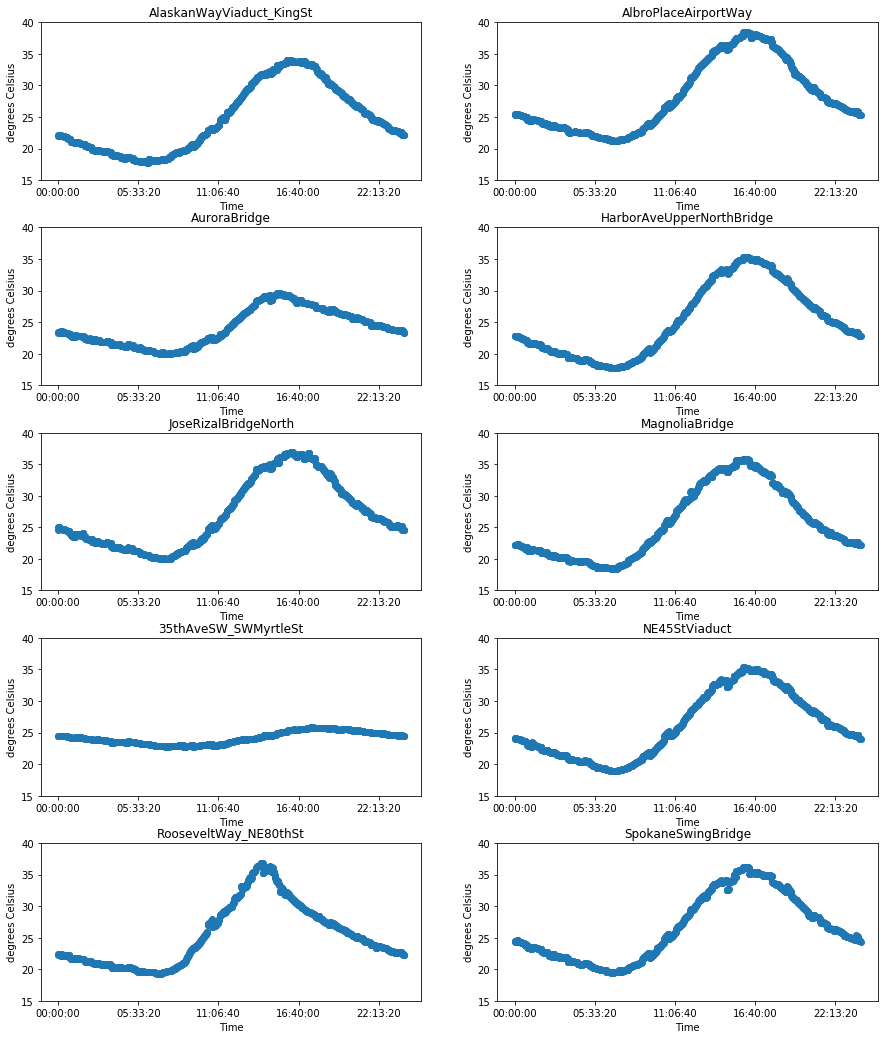

In [94]:
#Compute average temperature for each time interval and station (e.g., time series) for August 2016
#and plot the series

import matplotlib.pyplot as plt

#Create empty image
fig = plt.figure(figsize=(15,18))
plt.subplots_adjust(hspace=0.3)

#Empty lists to store peak times, station names, and max road surface temperatures
peak=[]
names=[]

#Loop through the station list
for i, station in enumerate(station_list):
    
    mean_t=station.groupby('Time').RoadSurfaceTemperature.mean()
    
    #Convert Fahrenheit degrees into Celsius degrees
    mean_t=mean_t.apply(lambda x: ((x - 32) * 5/9))
    
    #Save station names, peak times, and temperatures
    peak.append(mean_t.idxmax().strftime("%H:%M:%S"))
    names.append(str(station.StationName[1]))
    
    #Add plot
    ax = fig.add_subplot(5, 2, i+1)
    plt.scatter(mean_t.index, mean_t)
    plt.title(str(station.StationName[1]))
    plt.xlabel("Time")
    plt.ylabel("degrees Celsius")
    plt.ylim(15,40)

plt.show()  

In [99]:
#Show peak times
peak_df=pd.DataFrame({'Station Name' : names, 'Peak Time': peak})
peak_df=peak_df[['Station Name','Peak Time']]
peak_df

,Station Name,Peak Time
0,AlaskanWayViaduct_KingSt,15:55:00
1,AlbroPlaceAirportWay,15:55:00
2,AuroraBridge,15:21:00
3,HarborAveUpperNorthBridge,16:08:00
4,JoseRizalBridgeNorth,16:10:00
5,MagnoliaBridge,15:51:00
6,35thAveSW_SWMyrtleSt,17:35:00
7,NE45StViaduct,15:54:00
8,RooseveltWay_NE80thSt,14:05:00
9,SpokaneSwingBridge,16:10:00


In [171]:
#Extract average road surface temperatures for the 3:50PM-4:10PM interval

#Empty dictionary to store station names and average peak road surface temperatures
peak_temp={}

#Loop through the station list
for i, station in enumerate(station_list):
    
    mean_t=station.groupby('Time').RoadSurfaceTemperature.mean()
    mean_t=mean_t.apply(lambda x: ((x - 32) * 5/9))
        
    #Save the average temperature between 3:50PM and 4:10PM
    peak_temp[str(station.StationName[1])]=round(mean_t[950:971].mean(),3)

#Visualize data frame
max_t=pd.DataFrame({'Station Name':peak_temp.keys(), 'Max Temperature': peak_temp.values()})
max_t=max_t[['Station Name', 'Max Temperature']]
max_t

,Station Name,Max Temperature
0,HarborAveUpperNorthBridge,35.322
1,AuroraBridge,29.165
2,NE45StViaduct,35.186
3,35thAveSW_SWMyrtleSt,25.340
4,SpokaneSwingBridge,36.147
5,RooseveltWay_NE80thSt,31.708
6,AlbroPlaceAirportWay,38.352
7,AlaskanWayViaduct_KingSt,33.939
8,MagnoliaBridge,35.767
9,JoseRizalBridgeNorth,36.774


### Interactive plotting

In [204]:
#Sensor locations
sensors=pd.read_csv('sensors.csv')

#Add temperature column
complete=pd.merge(sensors, max_t, on='Station Name', how='outer')
complete

,OBJECTID,Station Name,Lat,Lon,Max Temperature
0,1,35thAveSW_SWMyrtleSt,47.53918,-122.36758,25.340
1,2,AlaskanWayViaduct_KingSt,47.59844,-122.33561,33.939
2,3,AlbroPlaceAirportWay,47.54743,-122.31411,38.352
3,4,AuroraBridge,47.64317,-122.34728,29.165
4,5,HarborAveUpperNorthBridge,47.57169,-122.37087,35.322
5,6,JoseRizalBridgeNorth,47.59653,-122.31730,36.774
6,7,MagnoliaBridge,47.63345,-122.38734,35.767
7,8,NE45StViaduct,47.66127,-122.30193,35.186
8,9,RooseveltWay_NE80thSt,47.69209,-122.31765,31.708
9,10,SpokaneSwingBridge,47.57139,-122.35174,36.147


In [281]:
import numpy as np
import pandas as pd
import folium
import branca
import matplotlib.pyplot as plt

#Set coordinates
SEATTLE_COORDINATES = (47.59844, -122.33561)

#Empty map zoomed in on Seattle
map = folium.Map(location=SEATTLE_COORDINATES, zoom_start=11.48, tiles='Stamen Terrain')

#Create group of circle markers
f = folium.map.FeatureGroup()

lats=complete['Lat'].tolist()
lngs=complete['Lon'].tolist()
sizes=complete['Max Temperature'].tolist()
popup=complete['Station Name'].tolist()

#Colormap
colors=np.asarray(sizes)
cm = branca.colormap.LinearColormap(['green', 'yellow', 'red'], vmin=25, vmax=41)
cm.caption = 'Road Surface Temperature [degrees Celsius]'
map.add_child(cm)

#Add color-coded circles
for lat, lng, size, color in zip(lats, lngs, sizes, colors):
    f.add_child(folium.features.CircleMarker(
            [lat, lng],
            radius=size,
            color=None,
            #popup=popup,
            fill_color=cm(color)))  
map.add_child(f)

#Add markers with popups
for each in complete[0:10].iterrows():
    folium.Marker([each[1]['Lat'],each[1]['Lon']], 
                  popup='Bridge: '+each[1]['Station Name']+'; Max Temp: '+str(each[1]['Max Temperature'])).add_to(map)

#Display
map